# Ranking cholestrol containing simulations

# Initialize NMRlipids databank

In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
#import mdtraj
import urllib.request
import yaml
import pprint
import pandas as pd
from pandas.io.json import json_normalize
import math
import numpy as np

sys.path.insert(1, '../../Databank/Scripts/BuildDatabank/')
from databankLibrary import download_link, lipids_dict, databank

path = '../../Databank/Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

def ShowTable(SortedQualities, quality):
    rounding = ['headgroup', 'sn-1', 'sn-2', 'total', 'tails', 'FFQuality']
    QualityTable = []
    pd.set_option('display.max_rows', None)
    for i in SortedQualities:
        StoredToTable = []
        #
        #
        #print(i)
        for k, v in i[quality].items():
            #print(k,v)
            if k in rounding:
                #print(len(v))
                if v and v != float("inf") and not math.isnan(v):
                    i[quality][k] = round(float(v), 2)
        #
        #
        StoredToTable = i[quality]
        StoredToTable['Forcefield'] = i['system']['FF']
        molecules = ''
        MolNumbers = ''
        Npopc = sum(i['system']['COMPOSITION']['POPC']['COUNT'])
        Nchol = sum(i['system']['COMPOSITION']['CHOL']['COUNT'])
        StoredToTable['CholFraction'] = round(Nchol/(Npopc+Nchol),2)
        for lipid in i['system']['COMPOSITION']:
            #print(np.sum(i['system']['COMPOSITION'][lipid]['COUNT']))
            molecules = molecules + lipid + ':'
            MolNumbers = MolNumbers + str(np.sum(i['system']['COMPOSITION'][lipid]['COUNT']))  + ':'
        StoredToTable['Molecules'] = molecules[:-1]
        StoredToTable['Number of molecules'] = ' (' + MolNumbers[:-1] + ')'
        StoredToTable['Temperature'] = i['system']['TEMPERATURE']
        StoredToTable['ID'] = i['system']['ID']
        QualityTable.append(StoredToTable)    
    display(pd.json_normalize(QualityTable))
    
    
def plotFormFactor(expFormFactor,k,legend,PlotColor):
    xValues = []
    yValues = []
    for i in expFormFactor:
        xValues.append(i[0])
        yValues.append(k*i[1])
    plt.plot(xValues,yValues,label = legend,color=PlotColor,linewidth=4.0)
    plt.xlabel(r'$q_{z} [Å^{-1}]$',size=20)
    plt.ylabel(r'$|F(q_{z})|$',size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.xlim([0,0.69])
    plt.ylim([-10,250])
    plt.legend(loc="upper right")
    plt.savefig('FormFactor.pdf')


def plotOrderParameters(OPsim, OPexp):
    xValuesHG = []
    xValuesSN1 = []
    xValuesSN2 = []
    
    yValuesHGsim = []
    yValuesSN1sim = []
    yValuesSN2sim = []
    yValuesHGsimERR = []
    yValuesSN1simERR = []
    yValuesSN2simERR = []
    yValuesHGexp = []
    yValuesSN1exp = []
    yValuesSN2exp = []

    sn1carbons = {'M_G1C3_M M_G1C3H1_M' :2,
                  'M_G1C3_M M_G1C3H2_M' :2,
                  'M_G1C4_M M_G1C4H1_M' :3,
                  'M_G1C4_M M_G1C4H2_M' :3,
                  'M_G1C5_M M_G1C5H1_M' :4,
                  'M_G1C5_M M_G1C5H2_M' :4,
                  'M_G1C6_M M_G1C6H1_M' :5,
                  'M_G1C6_M M_G1C6H2_M' :5,
                  'M_G1C7_M M_G1C7H1_M' :6,
                  'M_G1C7_M M_G1C7H2_M' :6,
                  'M_G1C8_M M_G1C8H1_M' :7,
                  'M_G1C8_M M_G1C8H2_M' :7,
                  'M_G1C9_M M_G1C9H1_M' :8,
                  'M_G1C9_M M_G1C9H2_M' :8,
                  'M_G1C10_M M_G1C10H1_M' :9,
                  'M_G1C10_M M_G1C10H2_M' :9,
                  'M_G1C11_M M_G1C11H1_M' :10,
                  'M_G1C11_M M_G1C11H2_M' :10,
                  'M_G1C12_M M_G1C12H1_M' :11,
                  'M_G1C12_M M_G1C12H2_M' :11,
                  'M_G1C13_M M_G1C13H1_M' :12,
                  'M_G1C13_M M_G1C13H2_M' :12,
                  'M_G1C14_M M_G1C14H1_M' :13,
                  'M_G1C14_M M_G1C14H2_M' :13,
                  'M_G1C15_M M_G1C15H1_M' :14,
                  'M_G1C15_M M_G1C15H2_M' :14,
                  'M_G1C16_M M_G1C16H1_M' :15,
                  'M_G1C16_M M_G1C16H2_M' :15,
                  'M_G1C17_M M_G1C17H1_M' :16,
                  'M_G1C17_M M_G1C17H2_M' :16,
                  'M_G1C17_M M_G1C17H3_M' :16,
                 }
    
    sn2carbons = {'M_G2C3_M M_G2C3H1_M' :2,
                  'M_G2C3_M M_G2C3H2_M' :2,
                  'M_G2C4_M M_G2C4H1_M' :3,
                  'M_G2C4_M M_G2C4H2_M' :3,
                  'M_G2C5_M M_G2C5H1_M' :4,
                  'M_G2C5_M M_G2C5H2_M' :4,
                  'M_G2C6_M M_G2C6H1_M' :5,
                  'M_G2C6_M M_G2C6H2_M' :5,
                  'M_G2C7_M M_G2C7H1_M' :6,
                  'M_G2C7_M M_G2C7H2_M' :6,
                  'M_G2C8_M M_G2C8H1_M' :7,
                  'M_G2C8_M M_G2C8H2_M' :7,
                  'M_G2C9_M M_G2C9H1_M' :8,
                  'M_G2C9_M M_G2C9H2_M' :8,
                  'M_G2C10_M M_G2C10H1_M' :9,
                  'M_G2C10_M M_G2C10H2_M' :9,
                  'M_G2C11_M M_G2C11H1_M' :10,
                  'M_G2C11_M M_G2C11H2_M' :10,
                  'M_G2C12_M M_G2C12H1_M' :11,
                  'M_G2C12_M M_G2C12H2_M' :11,
                  'M_G2C13_M M_G2C13H1_M' :12,
                  'M_G2C13_M M_G2C13H2_M' :12,
                  'M_G2C14_M M_G2C14H1_M' :13,
                  'M_G2C14_M M_G2C14H2_M' :13,
                  'M_G2C15_M M_G2C15H1_M' :14,
                  'M_G2C15_M M_G2C15H2_M' :14,
                  'M_G2C16_M M_G2C16H1_M' :15,
                  'M_G2C16_M M_G2C16H2_M' :15,
                  'M_G2C17_M M_G2C17H1_M' :16,
                  'M_G2C17_M M_G2C17H2_M' :16,
                  'M_G2C17_M M_G2C17H3_M' :16,
                  'M_G2C18_M M_G2C18H1_M' :17,
                  'M_G2C18_M M_G2C18H2_M' :17,
                  'M_G2C18_M M_G2C18H3_M' :17,
                  'M_G2C19_M M_G2C19H1_M' :18,
                  'M_G2C19_M M_G2C19H2_M' :18,
                  'M_G2C19_M M_G2C19H3_M' :18,
                 }
    
    HGcarbons = {'M_G3N6C1_M M_G3N6C1H1_M' : 1,
                 'M_G3N6C1_M M_G3N6C1H2_M' : 1,
                 'M_G3N6C1_M M_G3N6C1H3_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H1_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H2_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H3_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H1_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H2_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H3_M' : 1,
                 'M_G3C5_M M_G3C5H1_M' : 2,
                 'M_G3C5_M M_G3C5H2_M' : 2,
                 'M_G3C4_M M_G3C4H1_M' : 3,
                 'M_G3C4_M M_G3C4H2_M' : 3,
                 'M_G3_M M_G3H1_M' : 4,
                 'M_G3_M M_G3H2_M' : 4,
                 'M_G2_M M_G2H1_M' : 5,
                 'M_G1_M M_G1H1_M' : 6,
                 'M_G1_M M_G1H2_M' : 6,
                 }
    
    
    for key in OPsim:
        if 'M_G1C' in key:
            xValuesSN1.append(sn1carbons[key])
            yValuesSN1sim.append(float(OPsim[key][0][0]))
            yValuesSN1simERR.append(float(OPsim[key][0][2]))
            yValuesSN1exp.append(OPexp[key][0][0])
        elif 'M_G2C' in key:
            xValuesSN2.append(sn2carbons[key])
            yValuesSN2sim.append(float(OPsim[key][0][0]))
            yValuesSN2simERR.append(float(OPsim[key][0][2]))
            yValuesSN2exp.append(OPexp[key][0][0])
        elif 'M_G3' in key or 'M_G2_M' in key or 'M_G1_M' in key:
            xValuesHG.append(HGcarbons[key])
            yValuesHGsim.append(float(OPsim[key][0][0]))
            yValuesHGsimERR.append(float(OPsim[key][0][2]))
            yValuesHGexp.append(OPexp[key][0][0])
    #print(xValues,yValues)
    plt.rc('font', size=15)
    #plt.plot(xValuesHG,yValuesHGsim,'.',color='red',markersize=15)
    plt.errorbar(xValuesHG,yValuesHGexp, yerr = 0.02,fmt='.',color='black',markersize=25)
    plt.errorbar(xValuesHG,yValuesHGsim, yerr = yValuesHGsimERR,fmt='.',color='red',markersize=20)
    #plt.plot(xValuesHG,yValuesHGexp,'.',color='black',markersize=15)
    my_xticks = ['\u03B3','\u03B2','\u03B1','$g_{1}$','$g_{2}$','$g_{3}$']
    plt.xticks([1,2,3,4,5,6], my_xticks,size=20)
    #plt.xlabel('Carbon')
    plt.ylim([-0.25,0.25])
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.savefig('HG.pdf')
    plt.show()
    
    plt.text(2, -0.04, 'sn-1', fontsize=25)
    plt.xticks(np.arange(min(xValuesSN1), max(xValuesSN1)+1, 2.0))
    plt.plot(xValuesSN1,yValuesSN1sim,color='red')
    plt.plot(xValuesSN1,yValuesSN1exp,color='black')
    plt.errorbar(xValuesSN1,yValuesSN1sim, yerr = yValuesSN1simERR,fmt='.',color='red',markersize=25)
    plt.errorbar(xValuesSN1,yValuesSN1exp, yerr = 0.02, fmt='.',color='black',markersize=20)
    #plt.xlabel('Carbon')
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    #plt.ylim([-0.4,0.01])
    plt.savefig('sn-1.pdf')
    plt.show()
    
    plt.text(2, -0.04, 'sn-2', fontsize=25)
    plt.xticks(np.arange(min(xValuesSN2), max(xValuesSN2)+1, 2.0))
    plt.plot(xValuesSN2,yValuesSN2sim,color='red')
    plt.plot(xValuesSN2,yValuesSN2exp,color='black')
    plt.errorbar(xValuesSN2,yValuesSN2sim,yValuesSN2simERR,fmt='.',color='red',markersize=25)
    plt.errorbar(xValuesSN2,yValuesSN2exp, yerr = 0.02, fmt='.',color='black',markersize=20)
    plt.xlabel('Carbon',size=25)
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    #plt.ylim([-0.35,0.01])
    plt.savefig('sn-2.pdf')
    plt.show()


def plotSimulation(ID, lipid):
    DataBankPath = '../../Databank/Data/'
    for system in systems:
        #print(system)
        if system['ID'] == ID:
             path = DataBankPath + system['path']
    #lipid = 'POPC'
    FFpathSIM = path + 'FormFactor.json'
    OPpathSIM = path + lipid + 'OrderParameters.json'
    READMEfilepath = path + '/README.yaml'
    FFQualityFilePath = path + '/FormFactorQuality.json'

    
    with open(READMEfilepath) as yaml_file:
        readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
   
    print('DOI: ', readme['DOI'])
    print('Force field: ', readme['FF'])
    
    try:
        with open(FFQualityFilePath) as json_file:
            FFq = json.load(json_file)
        print('Form factor quality: ', FFq[0])
        for subdir, dirs, files in os.walk(DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/'):
            for filename in files:
                #filepath = '../../Data/experiments/FormFactors/' + expFFpath + '/' + filename
                if filename.endswith('_FormFactor.json'):
                    FFpathEXP = subdir + filename
        #FFpathEXP =  DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/POPS_ULV_25Cin0D_SHE_FormFactor.json'
        with open(FFpathEXP) as json_file:
            FFexp = json.load(json_file)
    
    except:
        print('Force field quality not found')
    
    
    with open(OPpathSIM) as json_file:
        OPsim = json.load(json_file)

    OPexp = {}
    for expOPfolder in list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values()):
        #expOPfolder = list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values())[0]
        OPpathEXP =  DataBankPath + 'experiments/OrderParameters/' + expOPfolder + '/' + lipid + '_Order_Parameters.json'
        #print(OPpathEXP)
        with open(OPpathEXP) as json_file:
            OPexp.update(json.load(json_file))
    #print(OPexp)

    try:
        with open(FFpathSIM) as json_file:
            FFsim = json.load(json_file)
        plotFormFactor(FFsim,1, 'Simulation','red')
        plotFormFactor(FFexp,FFq[1], 'Experiment','black')
        plt.show()
    except:
        print('Form factor plotting failed')
    
    plotOrderParameters(OPsim, OPexp)
    #print(OPsim)
    #print(OPexp)

/home/samuli/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


# Show form factor ranking only for systems with cholesterol

In [2]:
FFrankingPath = '../../Databank/Data/Ranking/SYSTEM_FormFactor_Ranking.json'
lipid = 'CHOL'

with open(FFrankingPath) as json_file:
    FFranking = json.load(json_file)
json_file.close()

NewRank = []

for i in FFranking:
    #print(i)
    #for tst in i:
    #    print(tst)
    if lipid in i['TotalQuality']['Molecules']:
        NewRank.append(i)
   
ShowTable(NewRank,'TotalQuality')
    
FFrankingPath = '../../Databank/Data/Ranking/POPC_sn-1_Ranking.json'
with open(FFrankingPath) as json_file:
    FFranking = json.load(json_file)
json_file.close()

NewRank = []

for i in FFranking:
    #print(i)
    #for tst in i:
    #    print(tst)
    if lipid in i['POPC']['Molecules']:
        NewRank.append(i)
   
ShowTable(NewRank,'POPC')


,FFQuality,Forcefield,Molecules,Number of molecules,Temperature,ID,CholFraction,headgroup,tails,total
0,0.07,Lipid17,POPC:SOL:CHOL,(64:4000:16),298.15,662,0.20,NaN,NaN,NaN
1,0.17,Lipid17,POPC:SOL:CHOL,(256:16000:64),298.15,666,0.20,NaN,NaN,NaN
2,0.17,Lipid17,POPC:SOL:CHOL,(1024:64000:256),298.15,667,0.20,NaN,NaN,NaN
3,0.23,MacRog,POPC:SOL:CHOL,(1024:64000:256),298.15,677,0.20,NaN,NaN,NaN
4,0.23,MacRog,POPC:SOL:CHOL,(256:16000:64),298.15,706,0.20,NaN,NaN,NaN
5,0.26,MacRog,POPC:SOL:CHOL,(64:3600:8),298.15,665,0.11,NaN,NaN,NaN
6,0.26,Lipid17,POPC:SOL:CHOL,(64:3600:8),298.15,680,0.11,NaN,NaN,NaN
7,0.27,Berger and Modified Höltje model for cholesterol,POPC:CHOL:SOL,(110:18:8481),298.00,589,0.14,0.02,0.40,0.27
8,0.33,Berger and Modified Höltje model for cholesterol,POPC:CHOL:SOL,(84:44:6794),298.00,206,0.34,0.04,0.07,0.06
9,0.36,MacRog,POPC:SOL:CHOL,(1024:57600:128),298.15,660,0.11,NaN,NaN,NaN


,sn-1,sn-2,headgroup,total,Forcefield,Molecules,Number of molecules,Temperature,ID,CholFraction
0,0.82,0.50,0.03,0.45,Berger and Modified Höltje model for cholesterol,POPC:CHOL:SOL,(120:8:7290),298.0,305,0.06
1,0.60,0.49,0.71,0.60,slipids,CHOL:POPC:SOL,(256:256:20334),298.0,82,0.50
2,0.37,0.71,0.03,0.37,Berger and Modified Höltje model for cholesterol,POPC:CHOL:SOL,(110:18:8481),298.0,589,0.14
3,0.17,0.24,0.07,0.16,Berger and Modified Höltje model for cholesterol,POPC:CHOL:SOL,(64:64:10314),298.0,299,0.50
4,0.12,0.18,0.08,0.13,Berger and Modified Höltje model for cholesterol,POPC:CHOL:SOL,(50:78:5782),298.0,15,0.61
5,0.08,0.26,0.10,0.15,Berger and Modified Höltje model for cholesterol,POPC:CHOL:SOL,(84:44:6794),298.0,206,0.34


# Selected simulations from each force field for each cholesterol concenration from ranking above 

# 6% chol

DOI:  10.5281/zenodo.4643899
Force field:  Berger and Modified Höltje model for cholesterol
Form factor quality:  0.754750000000004


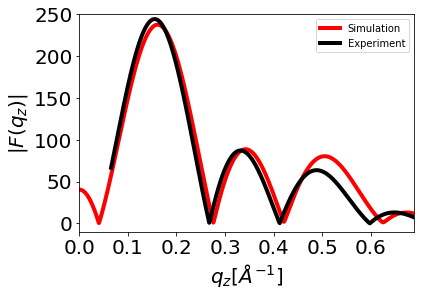

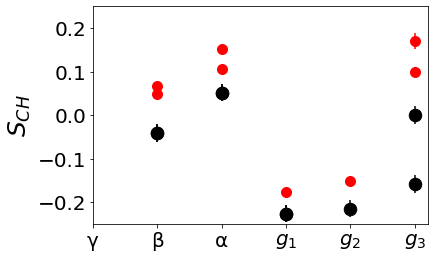

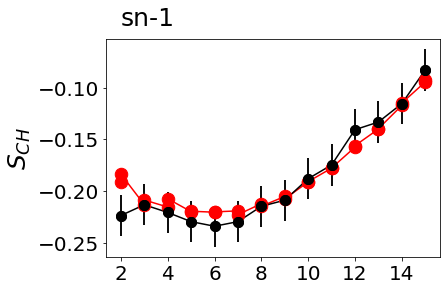

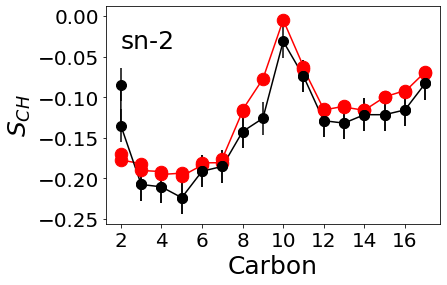

In [3]:
plotSimulation(305,'POPC')

# 11% cholesterol

DOI:  10.5281/zenodo.7022749
Force field:  Slipids
Form factor quality:  0.3338999999999981


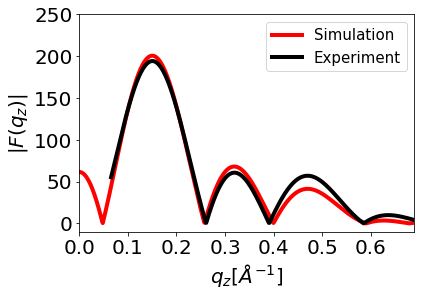

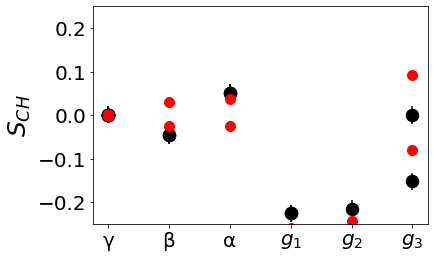

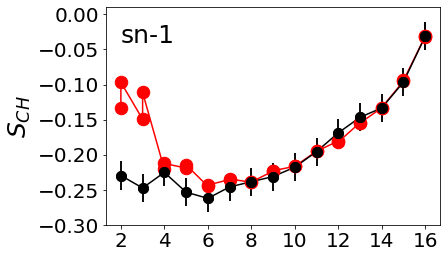

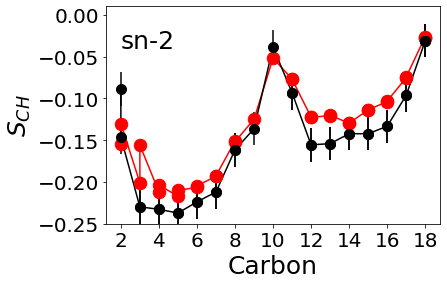

In [21]:
plotSimulation(697,'POPC')

DOI:  10.5281/zenodo.5767451
Force field:  CHARMM36
Form factor quality:  1.0338999999999932


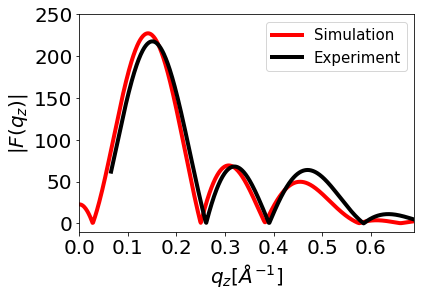

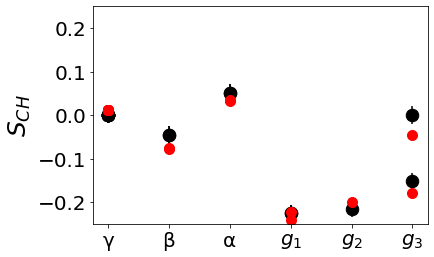

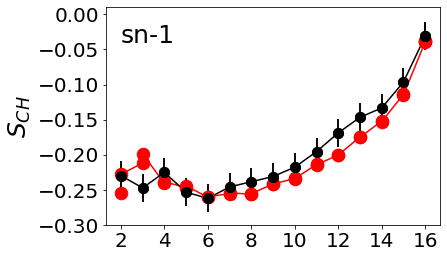

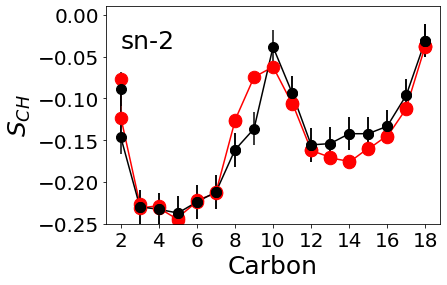

In [22]:
plotSimulation(426,'POPC')

DOI:  10.5281/zenodo.7061800
Force field:  MacRog
Form factor quality:  0.4661000000000026


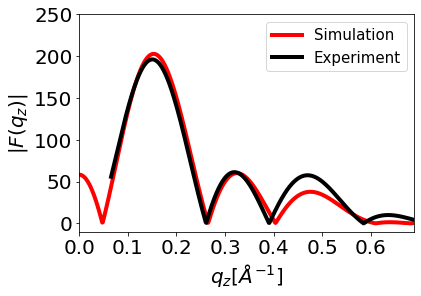

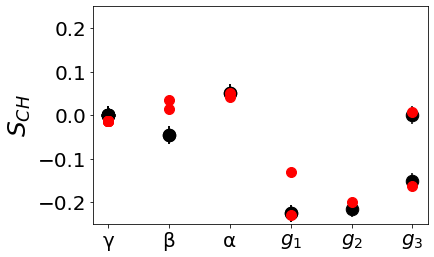

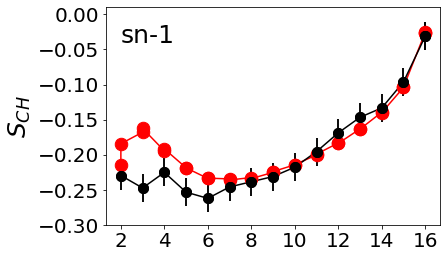

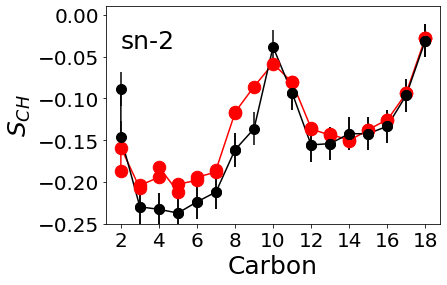

In [23]:
plotSimulation(660,'POPC')

DOI:  10.5281/zenodo.6992065
Force field:  Lipid17
Form factor quality:  0.5661000000000027


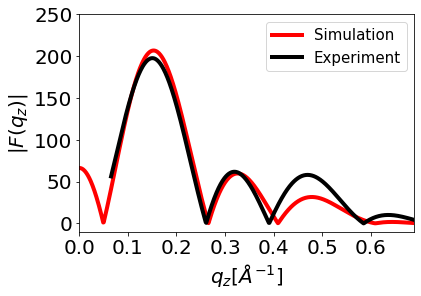

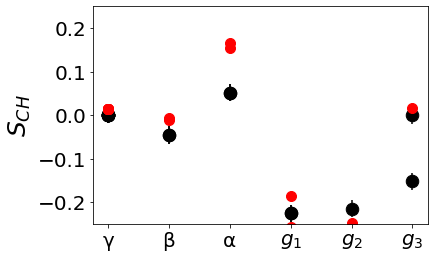

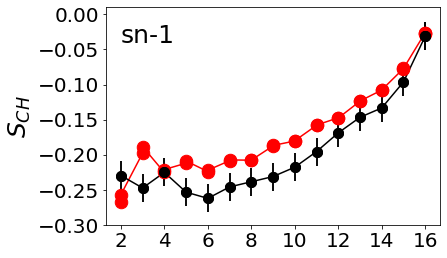

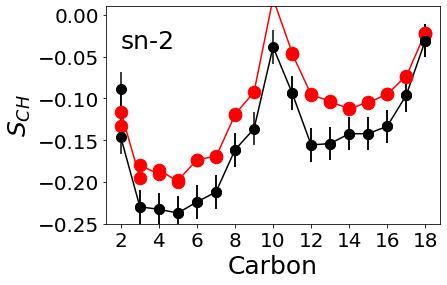

In [24]:
plotSimulation(663,'POPC')

# 14% chol

DOI:  10.5281/zenodo.4643914
Force field:  Berger and Modified Höltje model for cholesterol
Form factor quality:  0.26610000000000245


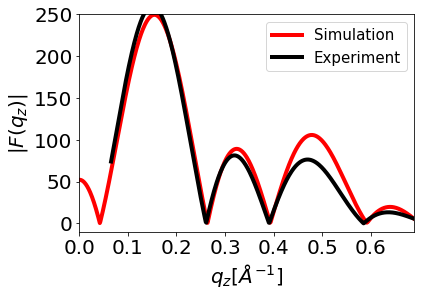

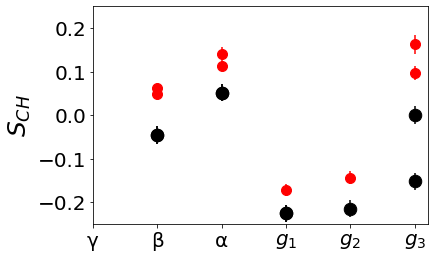

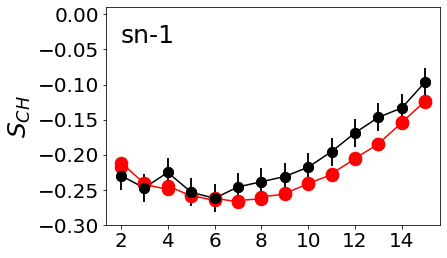

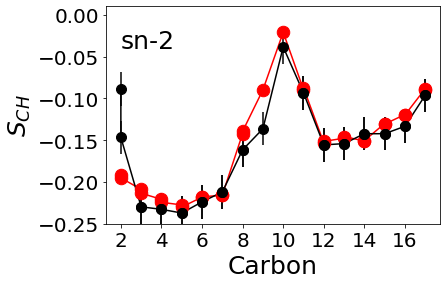

In [25]:
plotSimulation(589,'POPC')

# 20% chol

DOI:  10.5281/zenodo.6992065
Force field:  Lipid17
Form factor quality:  0.07420000000000204


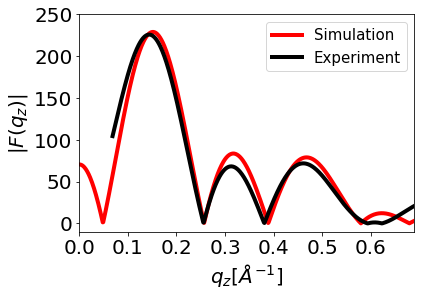

KeyError: 'M_G1_M M_G1H1_M'

In [26]:
plotSimulation(662,'POPC')

DOI:  10.5281/zenodo.7061800
Force field:  MacRog
Form factor quality:  0.22579999999999822


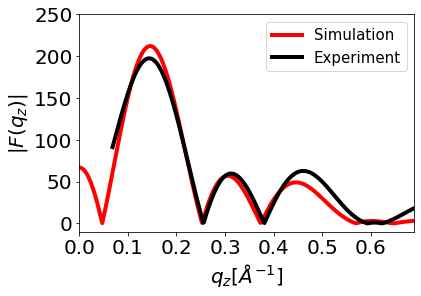

KeyError: 'M_G1_M M_G1H1_M'

In [27]:
plotSimulation(677,'POPC')

DOI:  10.5281/zenodo.7061800
Force field:  MacRog
Form factor quality:  0.6257999999999986


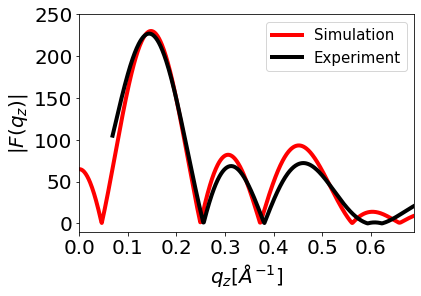

KeyError: 'M_G1_M M_G1H1_M'

In [28]:
plotSimulation(702,'POPC')

DOI:  10.5281/zenodo.7022749
Force field:  Slipids
Form factor quality:  0.7257999999999987


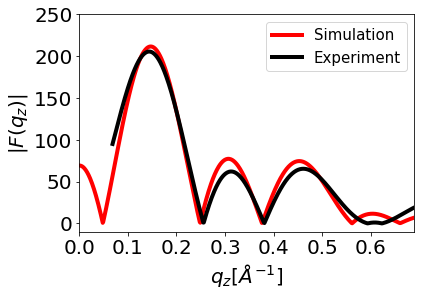

KeyError: 'M_G1_M M_G1H1_M'

In [29]:
plotSimulation(687,'POPC')

DOI:  10.5281/zenodo.5767451
Force field:  CHARMM36
Form factor quality:  1.4257999999999966


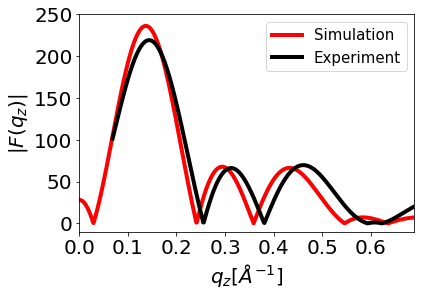

KeyError: 'M_G1_M M_G1H1_M'

In [30]:
plotSimulation(88,'POPC')

# 29% chol

DOI:  10.5281/zenodo.6992065
Force field:  Lipid17
Form factor quality:  0.6257999999999986


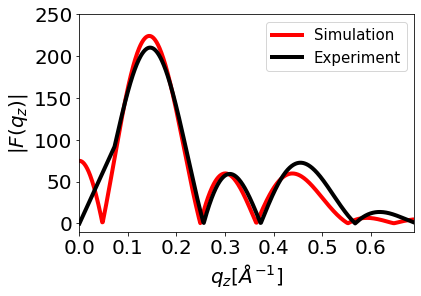

KeyError: 'M_G1_M M_G1H1_M'

In [31]:
plotSimulation(683,'POPC')

DOI:  10.5281/zenodo.7022749
Force field:  Slipids
Form factor quality:  1.2257999999999991


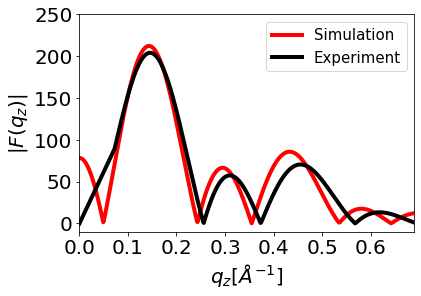

KeyError: 'M_G1_M M_G1H1_M'

In [32]:
plotSimulation(659,'POPC')

DOI:  10.5281/zenodo.7061800
Force field:  MacRog
Form factor quality:  1.4257999999999966


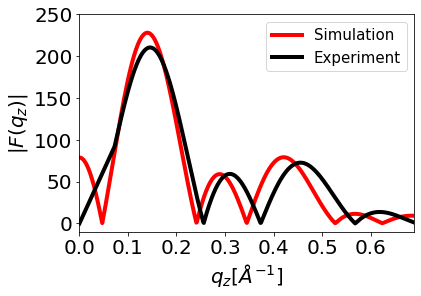

KeyError: 'M_G1_M M_G1H1_M'

In [33]:
plotSimulation(705,'POPC')

DOI:  10.5281/zenodo.5767451
Force field:  CHARMM36
Form factor quality:  1.925799999999997


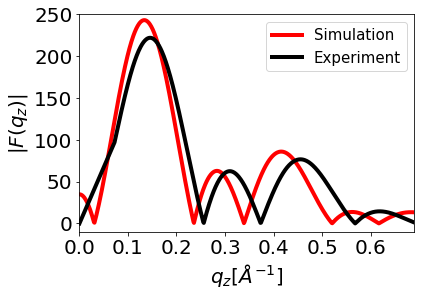

KeyError: 'M_G1_M M_G1H1_M'

In [34]:
plotSimulation(412,'POPC')

# 30% chol

DOI:  10.5281/zenodo.62026
Force field:  Slipids
Form factor quality:  1.4290000000000025
Force field quality not found
Form factor plotting failed


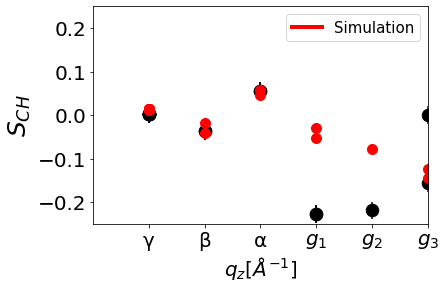

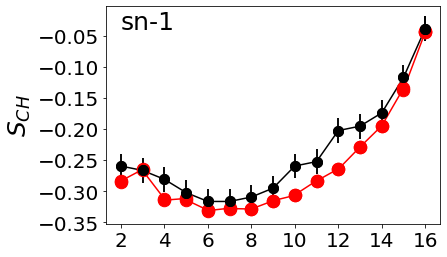

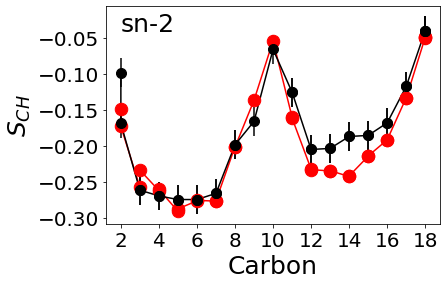

In [41]:
plotSimulation(118,'POPC')

# 34% chol

DOI:  10.5281/zenodo.4643985
Force field:  Berger and Modified Höltje model for cholesterol
Form factor quality:  0.3290000000000015


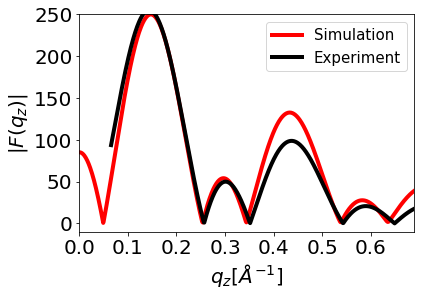

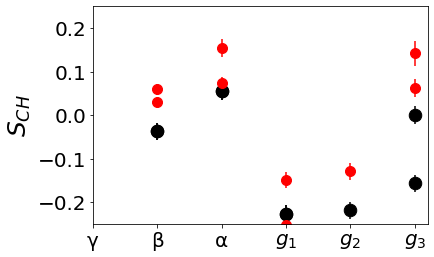

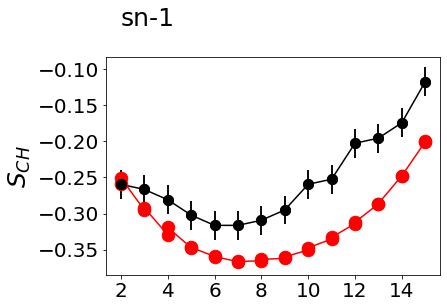

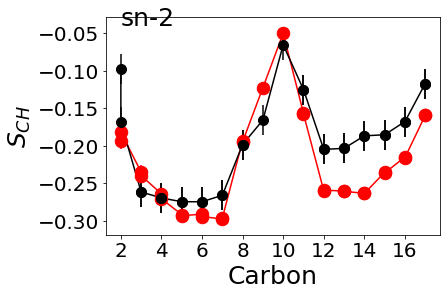

In [43]:
plotSimulation(206,'POPC')

# 38% chol

DOI:  10.5281/zenodo.7061800
Force field:  MacRog
Form factor quality:  2.033899999999997


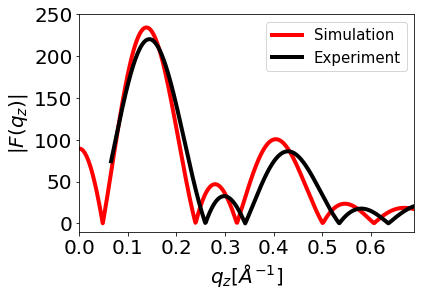

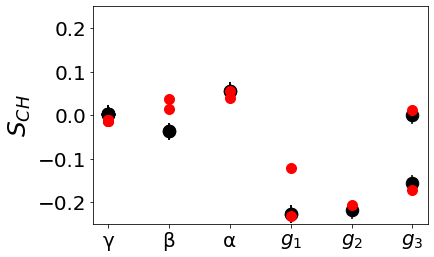

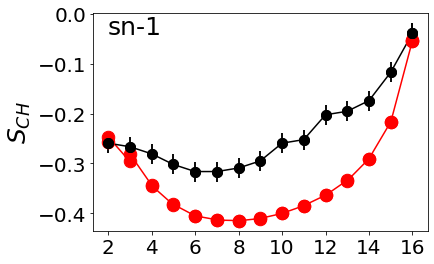

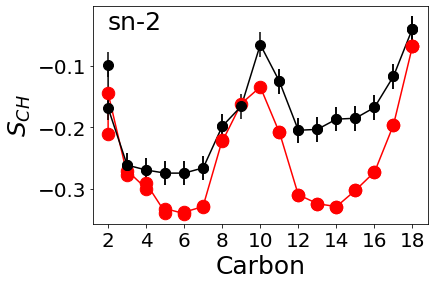

In [47]:
plotSimulation(698,'POPC')

DOI:  10.5281/zenodo.7022749
Force field:  Slipids
Form factor quality:  1.6338999999999966


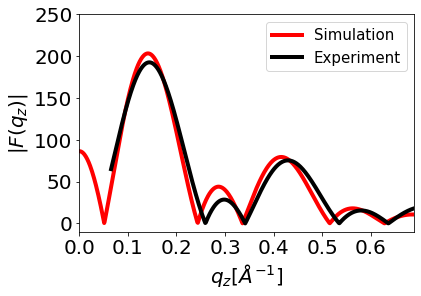

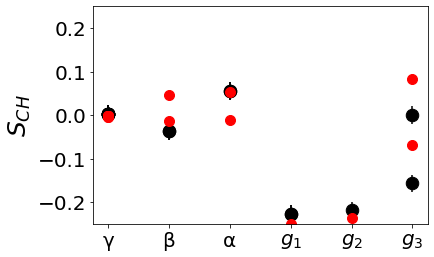

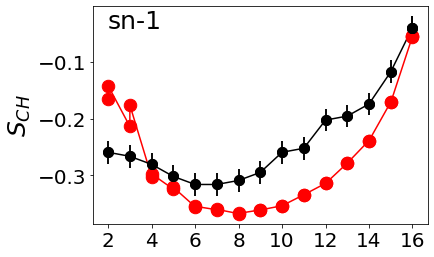

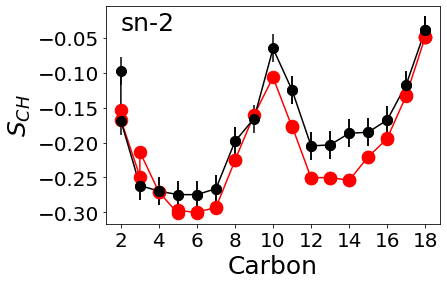

In [48]:
plotSimulation(670,'POPC')

DOI:  10.5281/zenodo.6992065
Force field:  Lipid17
Form factor quality:  1.5338999999999965


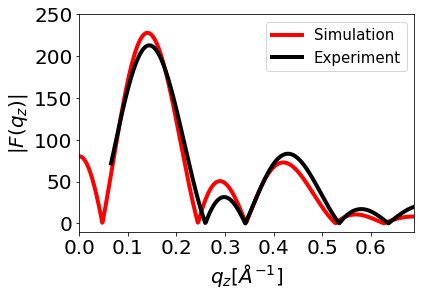

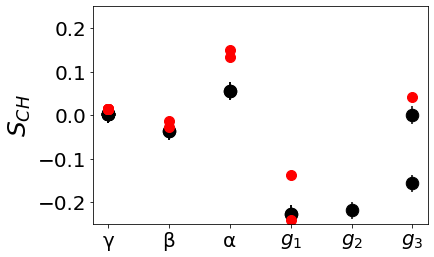

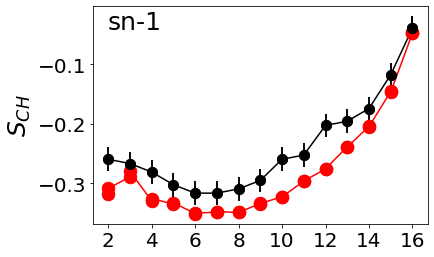

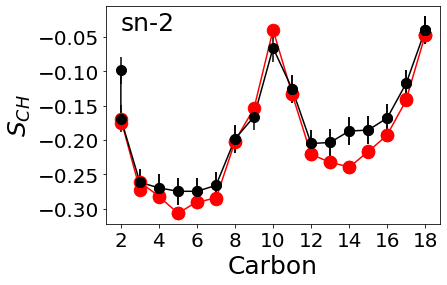

In [44]:
plotSimulation(673,'POPC')

DOI:  10.5281/zenodo.5767451
Force field:  CHARMM36
Form factor quality:  2.2338999999999998


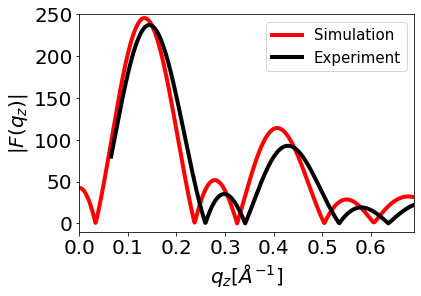

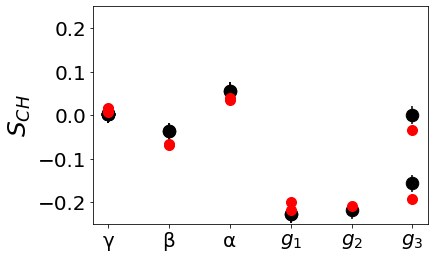

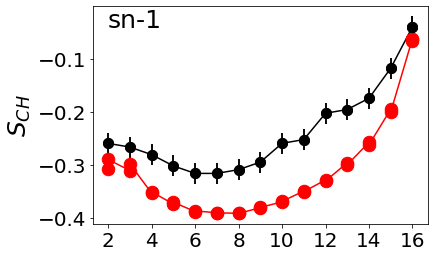

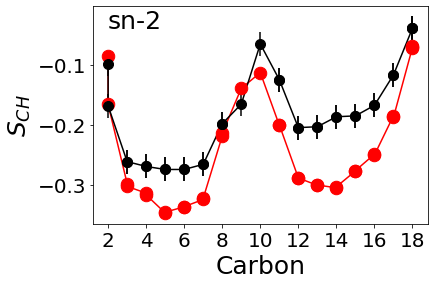

In [49]:
plotSimulation(620,'POPC')

# 47% chol

DOI:  10.5281/zenodo.6992065
Force field:  Lipid17
Form factor quality:  2.251700000000001


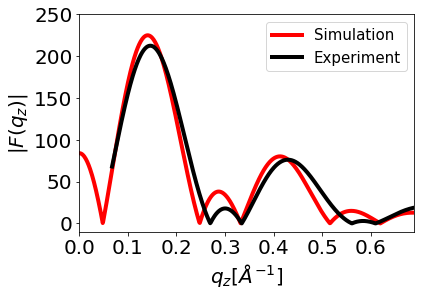

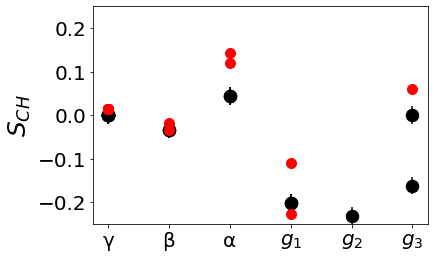

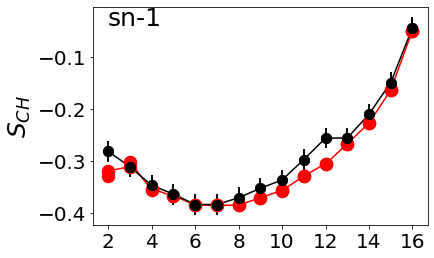

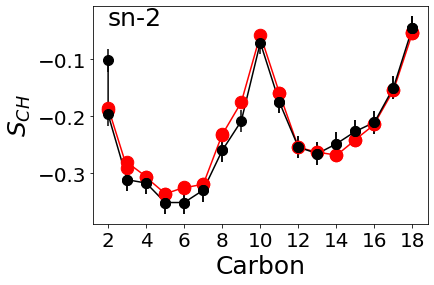

In [50]:
plotSimulation(717,'POPC')

DOI:  10.5281/zenodo.5767451
Force field:  CHARMM36
Form factor quality:  2.251700000000001


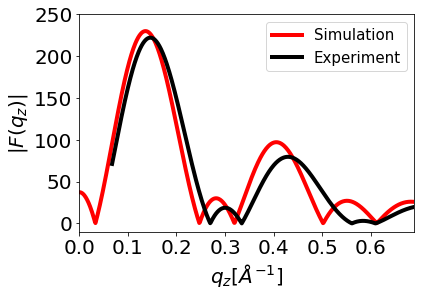

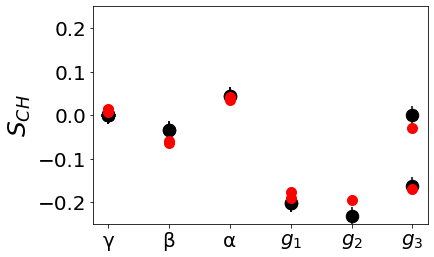

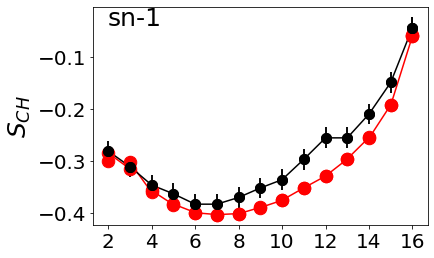

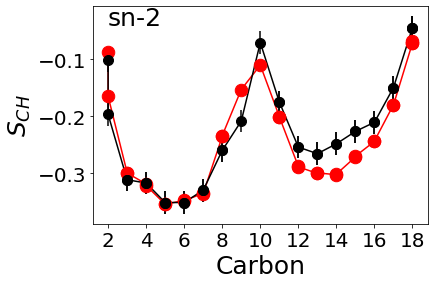

In [51]:
plotSimulation(166,'POPC')

DOI:  10.5281/zenodo.7022749
Force field:  Slipids
Form factor quality:  1.7517000000000005


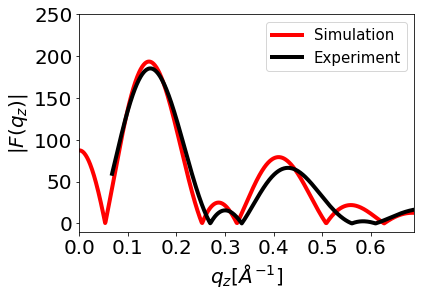

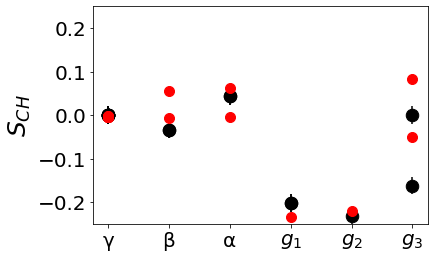

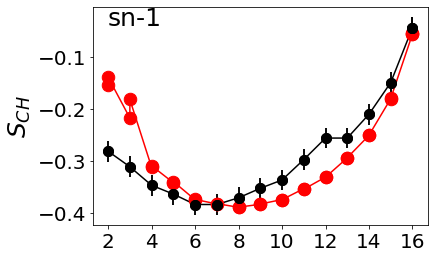

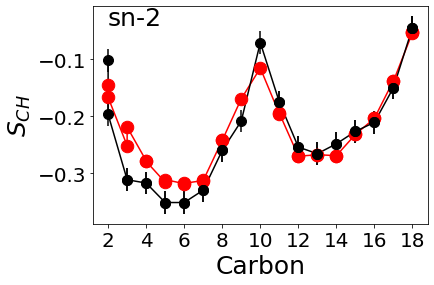

In [53]:
plotSimulation(682,'POPC')

DOI:  10.5281/zenodo.7061800
Force field:  MacRog
Form factor quality:  2.0517000000000007


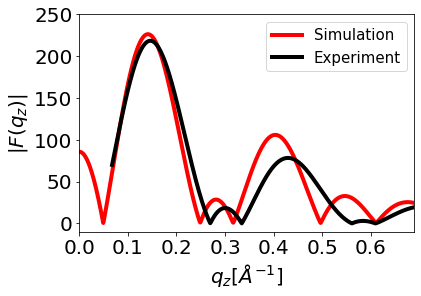

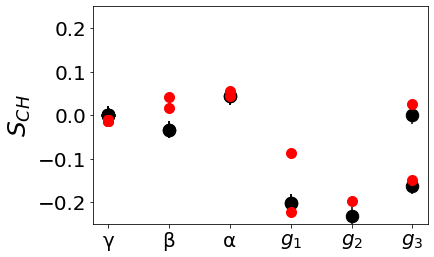

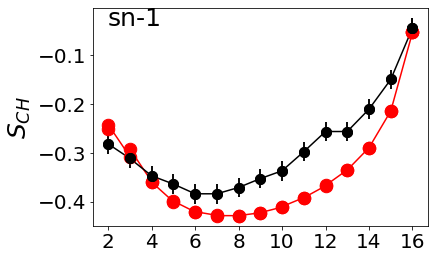

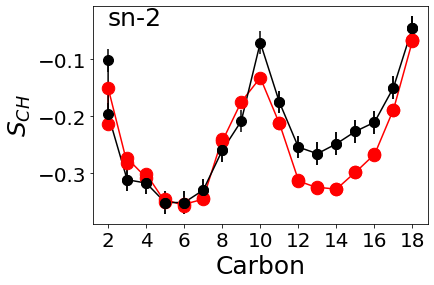

In [54]:
plotSimulation(699,'POPC')

# 50% chol

DOI:  10.5281/zenodo.159434
Force field:  slipids
Form factor quality:  3.3857999999999997


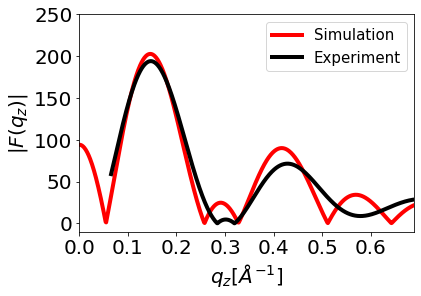

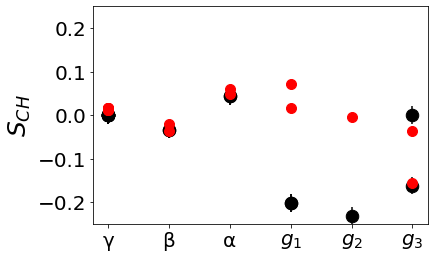

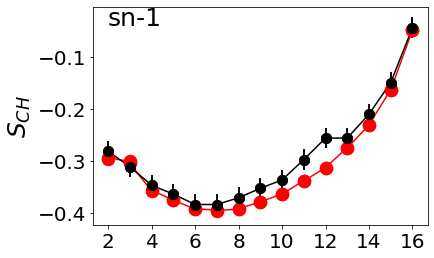

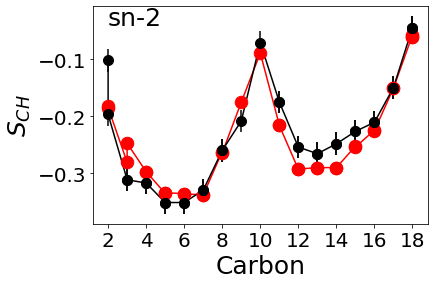

In [55]:
plotSimulation(82,'POPC')

DOI:  10.5281/zenodo.4643862
Force field:  Berger and Modified Höltje model for cholesterol
Form factor quality:  1.285799999999998


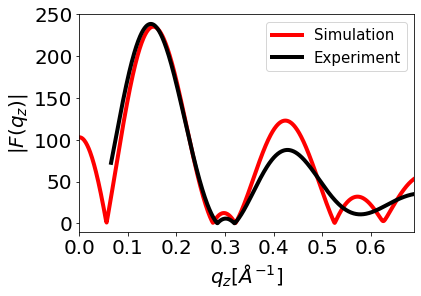

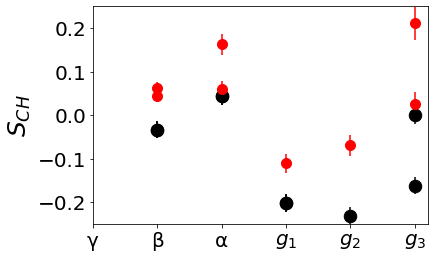

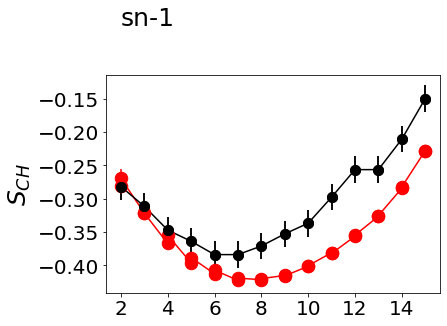

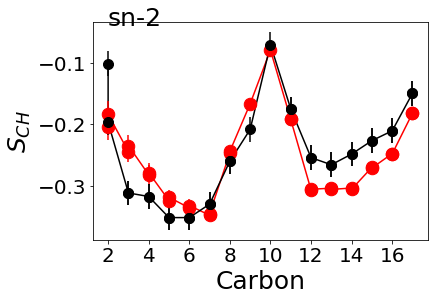

In [56]:
plotSimulation(299,'POPC')

# 61% chol

DOI:  10.5281/zenodo.4644028
Force field:  Berger and Modified Höltje model for cholesterol
Force field quality not found
Form factor plotting failed


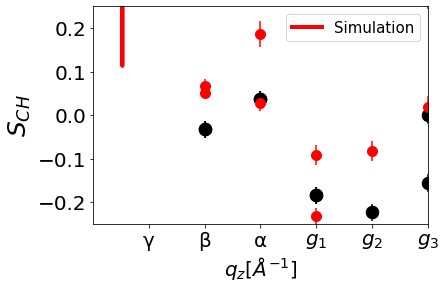

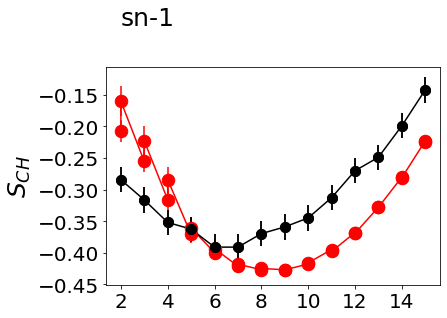

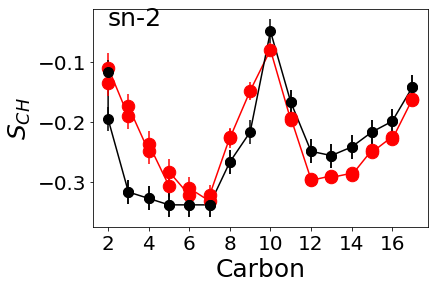

In [58]:
plotSimulation(15,'POPC')